#Dataset Description

# 🏠 California Housing Prices: Linear Regression Project

This project uses the **California Housing dataset**, which includes various features about housing blocks in California from the 1990 census. The goal is to predict the **median house value** using a **linear regression model**.

### 🔍 Dataset Features:
- `longitude` and `latitude`: Geographic location
- `housing_median_age`: Median age of the houses in the block
- `total_rooms`, `total_bedrooms`: Total number of rooms and bedrooms per block
- `population`: Total population of the block
- `households`: Total number of households
- `median_income`: Median income of households in the block (scaled)
- `ocean_proximity`: Categorical feature showing how close the block is to the ocean
- `median_house_value` (target): Median value of houses (in USD)

We also create new features such as:
- `rooms_per_household`
- `bedrooms_per_room`
- `population_per_household`

These engineered features help improve the performance of our regression model.


# Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
# 🎯 Set style for plots
sns.set(style="whitegrid")

# Loading Dataset

In [40]:
df = pd.read_csv("housing.csv")  # Replace with actual path if needed
df.dropna(inplace=True)

In [41]:
#Feature Engineering
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [42]:
# 🧹 Remove Outliers (Cap house value for cleaner regression)
df = df[df["median_house_value"] < 500000]

In [43]:
# 🧪 Define Features and Target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [44]:
# 🔢 Identify Feature Types
categorical_features = ["ocean_proximity"]
numerical_features = X.drop(columns=categorical_features).columns.tolist()

In [45]:
# ⚙️ Preprocessing: Scale + Encode
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

In [46]:
# 🧠 Create and Train the Pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))  # You can also try LinearRegression() here
])

In [47]:
# 🔀 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚂 Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('regressor', Ridge())])

In [48]:
# 📊 Evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:,.0f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3,573,125,672
R² Score: 0.63


#Visualization

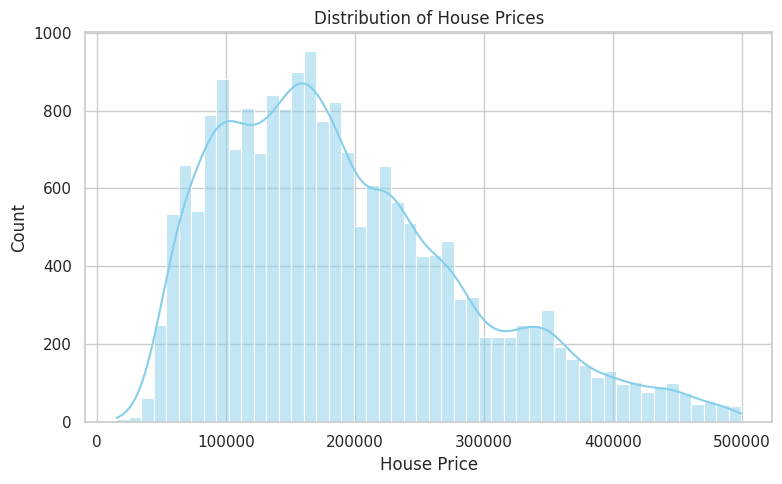

In [49]:
# Distribution of Target
plt.figure(figsize=(8, 5))
sns.histplot(df["median_house_value"], kde=True, color="skyblue")
plt.title("Distribution of House Prices")
plt.xlabel("House Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

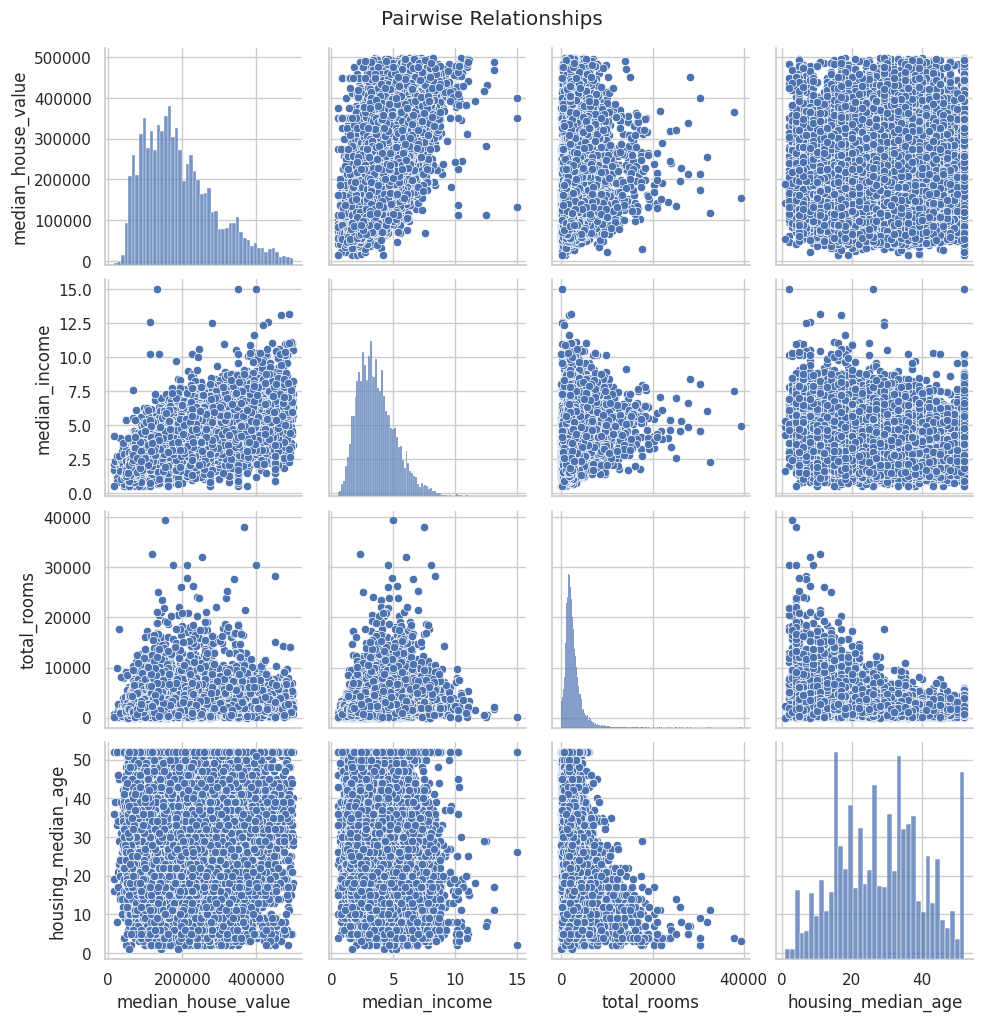

In [50]:
# Pairplot of Key Variables
sns.pairplot(df[["median_house_value", "median_income", "total_rooms", "housing_median_age"]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

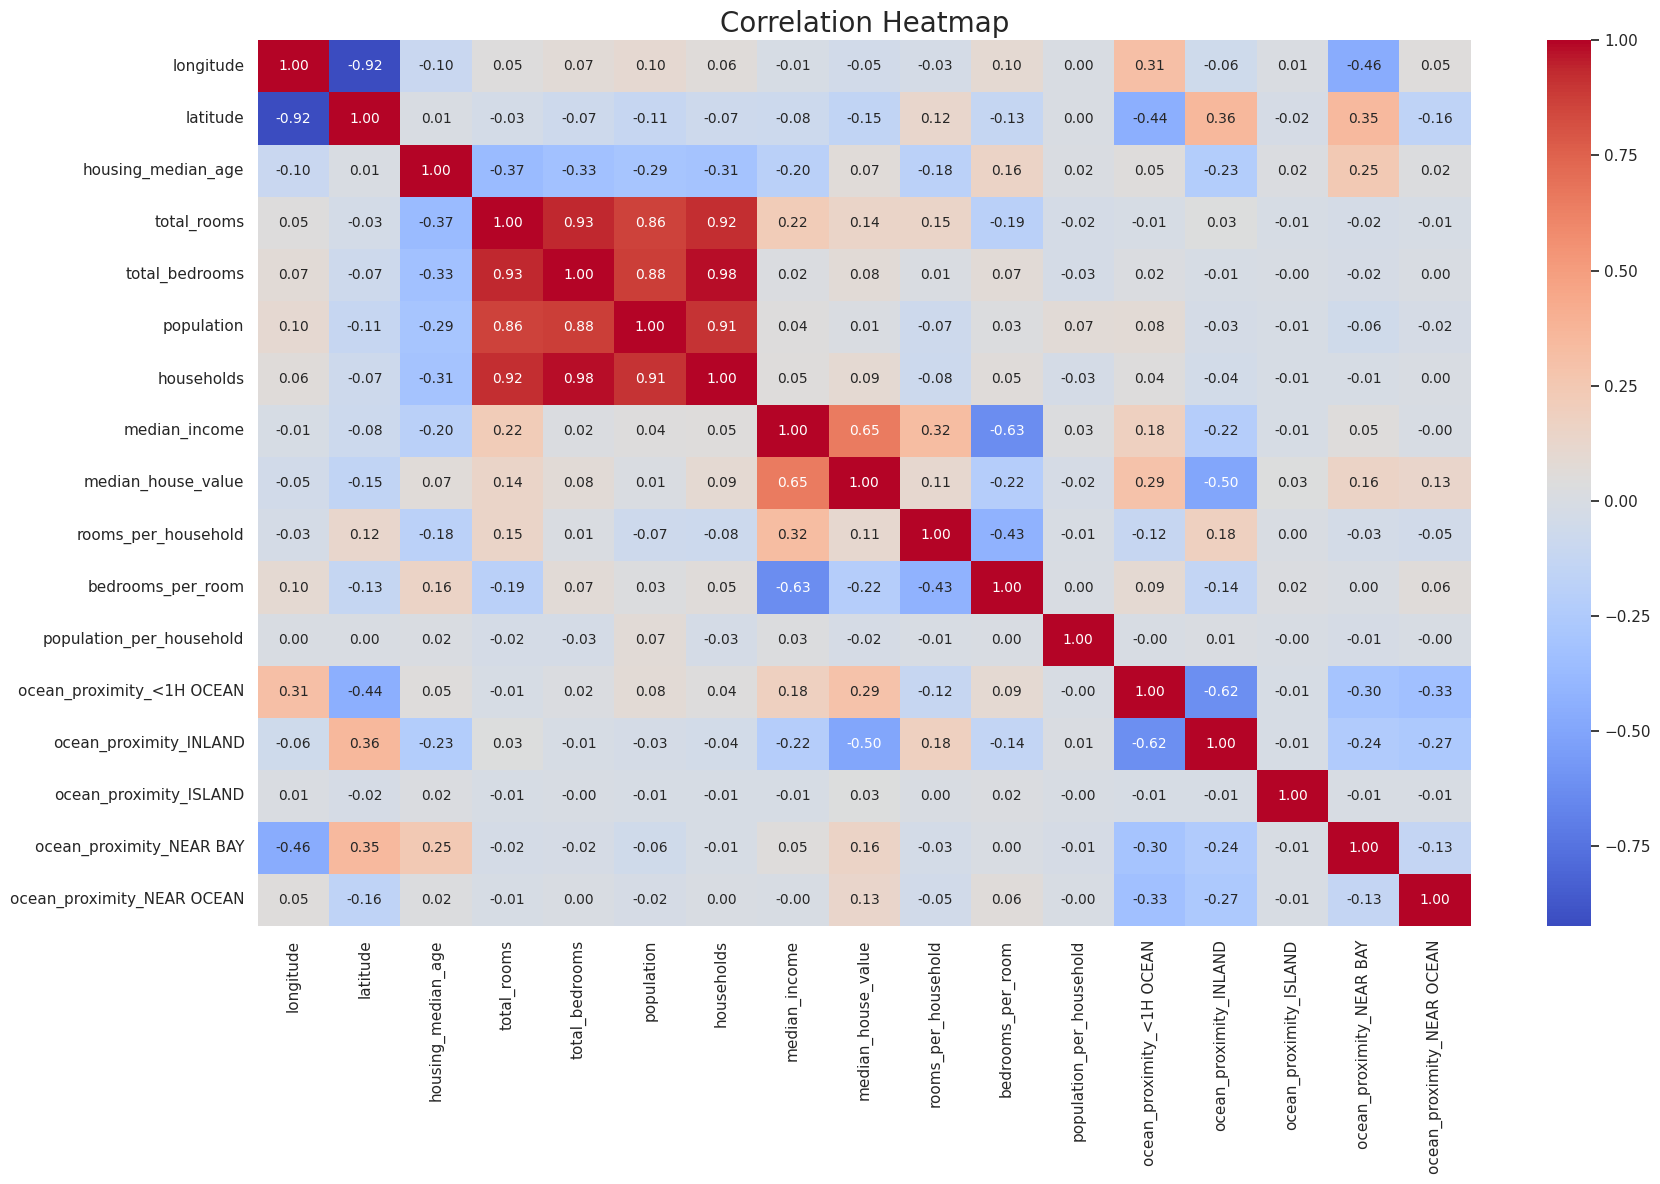

In [51]:
# Heatmap of Correlations
df_encoded = pd.get_dummies(df, columns=["ocean_proximity"])
plt.figure(figsize=(18, 12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title("Correlation Heatmap", fontsize=20)
plt.tight_layout()
plt.show()


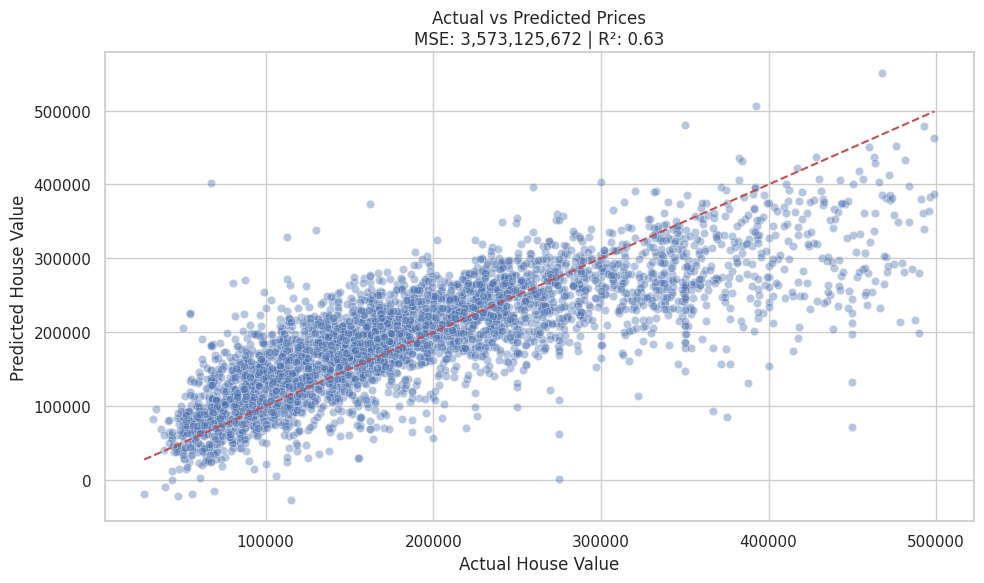

In [52]:
# Actual vs Predicted Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title(f"Actual vs Predicted Prices\nMSE: {mse:,.0f} | R²: {r2:.2f}")
plt.tight_layout()
plt.show()